# Two states model

For this example, we will be working on the model below :

<img src="../docs/two_states_rewarded.png">

We want to estimate the value of each state under the policy $\pi$ while behaving under $\mu$. This is an off-learning problem. You can quickly verify that the value under $\pi$ ($v_\pi$) is 93 for the first state and 100 for the second : $v_\pi = (93, 100)$.

Now let's see if the EmphaticTD can find also this optimal. To do so, we will use the identity ($I_2$) for our features.

## Imports

In [1]:
# Usual imports
import numpy as np
import matplotlib.pyplot as plt

# Import the library folder to Python libraries.
import sys
sys.path.insert(0, "../library/") # Path of the library

# Library imports
from TD import EmphaticTD, OffTD # the algorithm to use
from models import Model # The class to define our model
from policies import Policy, LeftRightPolicy, RandomPolicy # All the policies available for such model
from utils import comparatorTD # Tool to evaluate the TD algorithms on a model

In [2]:
# To make nice plot for Latex
%matplotlib notebook
plt.rcParams.update({'font.size': 13}) # for Latex
plt.rcParams['figure.figsize'] = [8, 5]

## First define your target and behavior policies

In [3]:
# Define the target and behavior policies
pi = LeftRightPolicy(p_right = 1) # Always to the right
mu = LeftRightPolicy(p_right = 0.5) # Uniform is default

Without a model, a policy is just an abstract class it has not generate a transiton matrix yet. Indeed, it cannot generate a transition matrix without the parameter of the model. Here for example, it needs the number of state. Thus, the class waits to be apply to a model to then only generate its matrix.

In [4]:
print(pi)

This policy has not been fitted yet !


With this system, you do need to worry about your model parameters, the policy will always be fitted correctly. 

## Next define your model

In [5]:
# Define the model
model = Model(
            ## Model definition
                features = np.identity(2), # features function
                R = [[0,3], [0, 10]], # transition reward
                pi = pi, # target policy
                mu = mu, # behavior policy
                v_pi = [93, 100], # exact state value under pi
    
            ## Parameters for TD
                I = [1,1], # interest function
                discounts = [0.9, 0.9], # discount function
    
            ## Initialisation
                S0 = 0, # Etat zero
                theta0 = np.ones(2),
             ) 

The model class will basically initialize all your parameters correctly to then be understood by the TD algorithms. It will first convert it to numpy array and compute some usefull variable for the learning algorithms. Thus, it is advised to not change the parameters of the model after its creation. As you may not use the good format.

After the model is initialize you can now access the generated parameters of your policies.

In [6]:
print(pi) # Now you can print its transition matrix

Transition matrix :
[[0. 1.]
 [0. 1.]]
Stationary distribution : [0. 1.]


## Run the algorithm

In [7]:
# Define the algorithm (then it can be used for any model)
emp = EmphaticTD(alpha = 0.01, lambdas = 0)

In [8]:
# Compute the stochastic descent for N particles
thetas = emp.run(model, T = 5000, N = 100)

emphatic TD has been computed for 5000 steps and 100 particles.


In [9]:
# Compute the deterministic descent (one particle)
theta_opt = emp.optimal_run(model, T = 5000)

## Plot the particles

### One dimension of theta

<IPython.core.display.Javascript object>


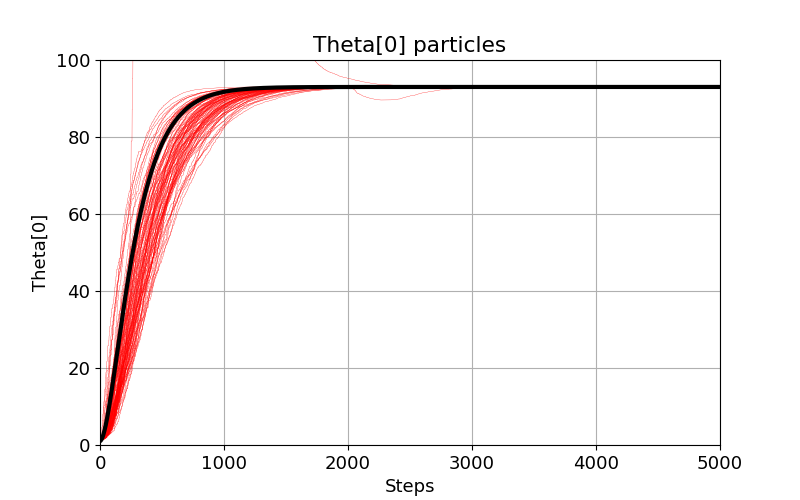

Text(0.5, 0, 'Steps')

In [10]:
i = 0 # We plot only one dimension of theta
plt.figure()
plt.plot(thetas[:, : , i], color = "red", linewidth = 0.2)
plt.plot(theta_opt[:, i], c = "black", linewidth = 3)
plt.title("Theta[{}] particles".format(i))
plt.ylim(0,100)
plt.xlim(0, 5000)
plt.grid(True)
plt.ylabel("Theta[{}]".format(i))
plt.xlabel("Steps")

## Plot the MSVE
To plot the MSVE, your model needs to have the attribute "v_pi". Here it is (93, 100).

In [11]:
# Compute the MSVE
msve = model.parallel_msve(thetas)
msve_opt = model.msve(theta_opt)

<IPython.core.display.Javascript object>


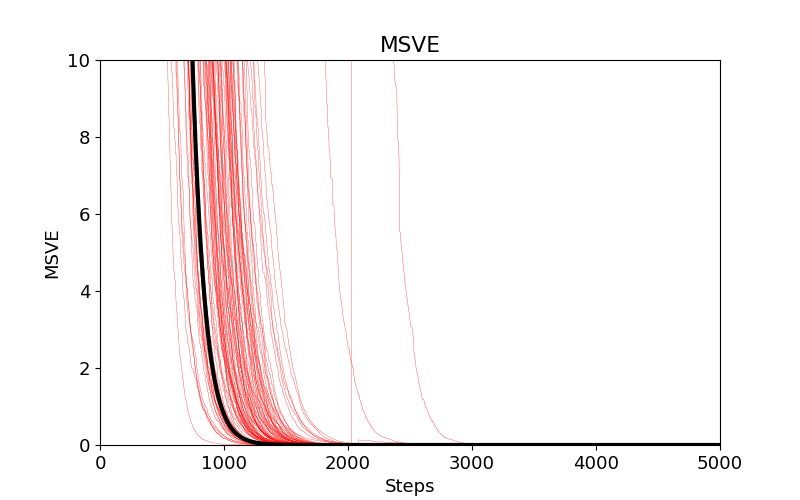

Text(0, 0.5, 'MSVE')

In [12]:
plt.figure()
plt.plot(msve, linewidth = 0.2, c = "red")
plt.plot(msve_opt, c = "black", linewidth = 3)
plt.title("MSVE")
plt.ylim(0,10)
plt.xlim(0, 5000)
plt.xlabel("Steps")
plt.ylabel("MSVE")

## Find the limit and the optimal theta

In [13]:
# The deterministic stable point : A^(-1)b
opt = emp.optimal(model)
print("The deterministic limit of theta is {}".format(opt))

The deterministic limit of theta is [ 93. 100.]


In [14]:
# Minimize the MSVE with scipy.optimize and return the result
msve_minimizer, msve_min = model.msve_min()
print("The MSVE has a minimum at {} for theta = {}".format(round(msve_min, 2), msve_minimizer.round(2)))

The MSVE has a minimum at 0.0 for theta = [ 93. 100.]


# Conclusion

The emphatic TD recover the correct value of each state.